In [1]:
import cv2
import os
import numpy as np 
from matplotlib import pyplot as plt

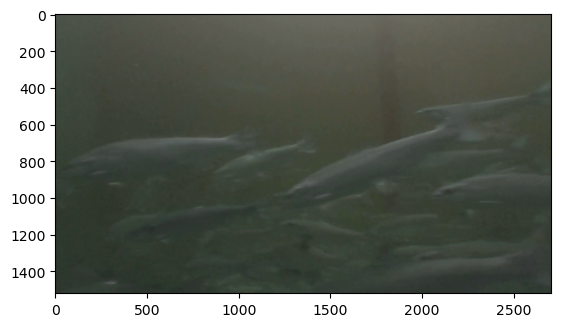

In [2]:
img = cv2.imread('C:\\Study\\salmon_pic\\active\\A00003\\1.jpg')
#cv2.imshow("img",img)
plt.imshow(img)
plt.show()

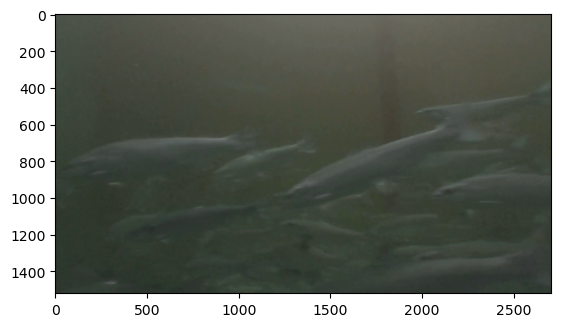

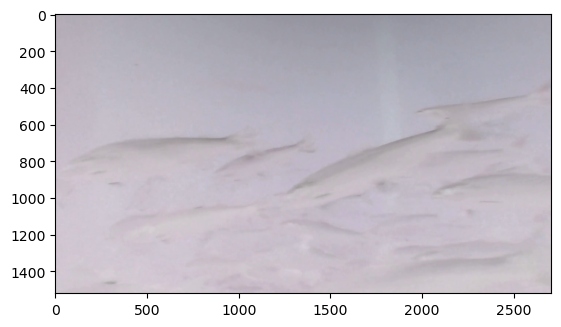

In [4]:
#色彩反转
import cv2 as cv
img = cv2.imread('C:\\Study\\salmon_pic\\active\\A00003\\1.jpg')
cha=img.shape
height,width,deep=cha
dst=np.zeros((height,width,3),np.uint8)
for i in range(height): 
    for j in range(width):
        b,g,r=img[i,j]
        dst[i,j]=(255-b,255-g,255-r)
#cv2.imshow('img',img)
#cv2.imshow('dst',dst)
plt.imshow(img)
plt.show()
plt.imshow(dst)
plt.show()
#cv2.waitKey()

In [13]:
#对比度拉伸
import cv2
import numpy as np
 
img = cv2.imread("C:\\Study\\salmon_pic\\active\\A00003\\1.jpg", 0)
Imax = np.max(img)
Imin = np.min(img)
MAX = 255
MIN = 0
img1 = (img - Imin) / (Imax - Imin) * (MAX - MIN) + MIN
cv2.imshow("img", img)
cv2.imshow("img_test", img1.astype('uint8'))#这个地方如果不转成深度为8的格式的话，由于原数据是小数的形式会导致图像显示错误
cv2.waitKey()

-1

In [15]:
#CLANE
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = Image.open('C:\\Study\\salmon_pic\\active\\A00003\\1.jpg').convert('RGB')
img = np.uint8(img)

imgr = img[:,:,0]
imgg = img[:,:,1]
imgb = img[:,:,2]

claher = cv2.createCLAHE(clipLimit=3, tileGridSize=(10,18))
claheg = cv2.createCLAHE(clipLimit=2, tileGridSize=(10,18))
claheb = cv2.createCLAHE(clipLimit=1, tileGridSize=(10,18))
cllr = claher.apply(imgr)
cllg = claheg.apply(imgg)
cllb = claheb.apply(imgb)

rgb_img = np.dstack((cllr,cllg,cllb))

#plt.subplot(1,2,1),plt.imshow(img)
#plt.title('oral'),plt.axis('off')
#plt.subplot(1,2,2),plt.imshow(rgb_img)
#plt.title('Clahe'),plt.axis('off')
#plt.imshow(img)
#plt.show()
#plt.imshow(rgb_img)
#plt.show()
cv2.imshow("CLANE", np.hstack([img,rgb_img]))
cv2.waitKey()
cv2.destroyAllWindows()


In [11]:
import cv2
 
img = cv2.imread('E://deep learning/img/fish.jpg')
img1 = cv2.blur(img,(5,5))
img2 = cv2.medianBlur(img, 5)
 
cv2.imshow("img",img)
cv2.imshow("img1",img1)
cv2.imshow("img2",img2)

cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
#RetinaX
#import argparse
import numpy as np
import cv2
 
def singleScaleRetinexProcess(img, sigma):
    temp = cv2.GaussianBlur(img, (0, 0), sigma)
    gaussian = np.where(temp == 0, 0.01, temp)
    retinex = np.log10(img + 0.01) - np.log10(gaussian)
    return retinex
 
def multiScaleRetinexProcess(img, sigma_list):
    retinex = np.zeros_like(img * 1.0)
    for sigma in sigma_list:
        retinex = singleScaleRetinexProcess(img, sigma)
    retinex = retinex / len(sigma_list)
    return retinex
 
def colorRestoration(img, alpha, beta):
    img_sum = np.sum(img, axis=2, keepdims=True)
    color_restoration = beta * (np.log10(alpha * img) - np.log10(img_sum))
    return color_restoration
 
def multiScaleRetinexWithColorRestorationProcess(img, sigma_list, G, b, alpha, beta):
    img = np.float64(img) + 1.0
    img_retinex = multiScaleRetinexProcess(img, sigma_list)
    img_color = colorRestoration(img, alpha, beta)
    img_msrcr = G * (img_retinex * img_color + b)
    return img_msrcr
 
def simplestColorBalance(img, low_clip, high_clip):
    total = img.shape[0] * img.shape[1]
    for i in range(img.shape[2]):
        unique, counts = np.unique(img[:, :, i], return_counts=True)
        current = 0
        for u, c in zip(unique, counts):
            if float(current) / total < low_clip:
                low_val = u
            if float(current) / total < high_clip:
                high_val = u
            current += c
        img[:, :, i] = np.maximum(np.minimum(img[:, :, i], high_val), low_val)
    return img
 
def touint8(img):
    for i in range(img.shape[2]):
        img[:, :, i] = (img[:, :, i] - np.min(img[:, :, i])) / \
                       (np.max(img[:, :, i]) - np.min(img[:, :, i])) * 255
    img = np.uint8(np.minimum(np.maximum(img, 0), 255))
    return img
 
def SSR(img, sigma=300):
    ssr = singleScaleRetinexProcess(img, sigma)
    ssr = touint8(ssr)
    return ssr
 
def MSR(img, sigma_list=[15, 80, 250]):
    msr = multiScaleRetinexProcess(img, sigma_list)
    msr = touint8(msr)
    return msr
 
def MSRCR(img, sigma_list=[15, 80, 250], G=5, b=25, alpha=125, beta=46, low_clip=0.01, high_clip=0.99):
    msrcr = multiScaleRetinexWithColorRestorationProcess(img, sigma_list, G, b, alpha, beta)
    msrcr = touint8(msrcr)
    msrcr = simplestColorBalance(msrcr, low_clip, high_clip)
    return msrcr
 
def main():
    #ap = argparse.ArgumentParser()
    #ap.add_argument('--image', required=True)
    #args = vars(ap.parse_args())
 
    #image = cv2.imread(args["image"])
    image = cv2.imread('C:\\Study\\salmon_pic\\active\\A00003\\1.jpg')
    ssr = SSR(image)
    msr = MSR(image)
    msrcr = MSRCR(image)
 
    cv2.namedWindow("Retinex", 0)
    cv2.resizeWindow('Retinex', 1400, 300)
    cv2.imshow("Retinex", np.hstack([image, ssr, msr, msrcr]))
    cv2.waitKey(0)
 
 
if __name__ == "__main__":
    main()

In [16]:
#亮度自适应增强
import numpy as np
import cv2


def compute(img, min_percentile, max_percentile):
    """计算分位点，目的是去掉图1的直方图两头的异常情况"""
    max_percentile_pixel = np.percentile(img, max_percentile)
    min_percentile_pixel = np.percentile(img, min_percentile)

    return max_percentile_pixel, min_percentile_pixel


def aug(src):
    """图像亮度增强"""
    if get_lightness(src)>130:
        print("图片亮度足够，不做增强")
    # 先计算分位点，去掉像素值中少数异常值，这个分位点可以自己配置。
    # 比如1中直方图的红色在0到255上都有值，但是实际上像素值主要在0到20内。
    max_percentile_pixel, min_percentile_pixel = compute(src, 1, 99)
    
    # 去掉分位值区间之外的值
    src[src>=max_percentile_pixel] = max_percentile_pixel
    src[src<=min_percentile_pixel] = min_percentile_pixel

    # 将分位值区间拉伸到0到255，这里取了255*0.1与255*0.9是因为可能会出现像素值溢出的情况，所以最好不要设置为0到255。
    out = np.zeros(src.shape, src.dtype)
    cv2.normalize(src, out, 255*0.1,255*0.9,cv2.NORM_MINMAX)

    return out

def get_lightness(src):
    # 计算亮度
    hsv_image = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
    lightness = hsv_image[:,:,2].mean()
    
    return  lightness

img = cv2.imread("C:\\Study\\salmon_pic\\active\\A00003\\1.jpg")
img = aug(img)
cv2.imwrite('C:\\Study\\salmon_pic\\active\\A00003\\output.jpg', img)


True

In [1]:
#传统方法提升
from PIL import Image, ImageEnhance

# 打开图像
img = Image.open("C:\\Study\\salmon_pic\\active\\A00003\\1.jpg")

# 创建亮度增强对象
enhancer = ImageEnhance.Brightness(img)

# 设置增强因子，0.0为黑色，1.0为原始，大于1.0为更亮
factor = 1.5

# 调整亮度并显示结果
new_img = enhancer.enhance(factor)
new_img.show()